# Intro

This is a simple tool to allow scripting of the awesome [XRT website](https://www.swift.ac.uk/xrt_products/index.php). The official API (which does a lot more) can be found [here](https://www.swift.ac.uk/user_objects/API/). 

These tools extend the functionality a bit. 

In [1]:
%matplotlib inline

from xrt_spec_dl import XRTLightCurve, download_xrt_spectral_data


ModuleNotFoundError: No module named 'xrt_spec_dl'

## Downloading Spectra

This allows you to download time-sliced spectra for spectral analysis. You can choose PC or WT mode.

In [2]:
obs_id = "01071993"

grb = "210905A"

In [ ]:
download_xrt_spectral_data(obs_id=obs_id,
    name=f"GRB {grb}",
    mode="PC",
    tstart=239,
    tstop=446,
    destination_dir=".")


!ls


## Downloading Light curves

To get the light curve data for plotting purposes, we need to know the obs_id of the GRB. the class will look at the Swift data online and pull it for making plots. In the future, a cache options will be included for off-line use. 


In [3]:
lc = XRTLightCurve(obs_id=obs_id)

The WT and PC data exist as astropy tables.

In [4]:
lc.wt_data

time,time_perr,time_nerr,rate,rate_perr,rate_nerr,bkg,bkg_err,fracexp
float64,float64,float64,float64,float64,float64,float64,float64,float64
98.6,0.494,-0.587,46.12369,6.87576,-6.876381,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
408.24,0.547,-0.485,47.25271,7.188487,-7.188536,0.6580304,0.6580304,1.0
409.253,0.494,-0.466,51.53035,7.681699,-7.681759,0.0,0.0,1.0


In [5]:
lc.pc_data

time,time_perr,time_nerr,rate,rate_perr,rate_nerr,bkg,bkg_err,fracexp
float64,float64,float64,float64,float64,float64,float64,float64,float64
257.813,11.352,-8.706,4.372901,0.9596635,-0.9596635,0.00582634,0.00291317,1.0
...,...,...,...,...,...,...,...,...
1418780.46,352287.473,-181877.223,0.003075002,0.0005201644,-0.0005201644,0.0003124656,7.748934e-06,0.03871
2570092.604,1007877.584,-272644.863,0.0006538729,0.0002275809,-0.0002275809,0.0001492451,3.738143e-06,0.020244


Finally, we can plot the data

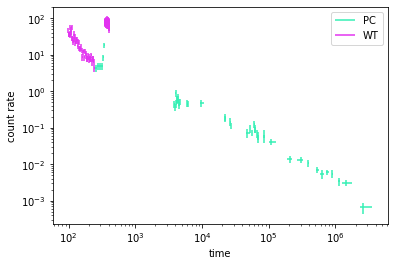

In [6]:
lc.plot(pc_mode=True, wt_mode=True);